# 🚢🐼🌳 Engenharia de Feautes com Pandas 

Neste `notebook` vamos estudar a biblioteca `pandas` usando um conjunto de dados dos passageiros do **RMS Titanic**. Por último tentaremos extrair informação dos dados a partir de árvores de decisão.

![Pandas](dados/944693_1_1029_panda_diplomacy_standard.jpg)


### O Que é `pandas`?

> ### Python Data Analysis Library
> Um conjunto de ferramentas para análise de dados em `Python`.

## 1. DataFrames
A estrutura de dados mais utilizada em `pandas` é o [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), que armazena os dados na forma de uma tabela. Os dados são indexados pelas colunas ( _columns_ ) e pelas linhas ( _indexes_ ).

Existem várias maneiras de declarar um `DataFrame`. Uma forma comum é passar um dicionário (`dict`) onde as chaves são as colunas e os valores são listas das linhas:

In [103]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
PALETA = [item["color"] for item in list(mpl.rcParams['axes.prop_cycle'])]

%matplotlib inline

dados = {
    "bamboo": [0, 10, 20],
    "taquara": [5, 15, 25],
    "grama": [-1, -2, None],
}
df_panda = pd.DataFrame(dados)
df_panda

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,NaN


O valor de retorno da última linha de um bloco de código é exibido no notebook, por isso a tabela acima é exibida.

Também é possível passar apenas os valores e declarar as colunas ou linhas no construtor do `DataFrame`:

In [2]:
dados = [[0, 5, -1], [10, 15, -2], [20, 25, None]]
pd.DataFrame(dados, columns=["bamboo", "taquara", "grama"])

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,NaN


Provavelmente as formas mais utilizadas para carregar um `DataFrame` são aquelas que carregam dados em disco. Entre os formatos suportados estão:
1. CSV
1. Excel
1. HDFS
1. JSON
1. Pickle
1. Parquet
1. SQL

Temos um arquivo `csv` de exemplo em `dados/train.csv`. As primeiras linhas do arquivo são:

In [3]:
ARQUIVO_TRAIN = "dados/train.csv"

with open(ARQUIVO_TRAIN, "r") as fp:
    dados = fp.read()
    print("O arquivo: {0} contém {1} linhas\n".format(ARQUIVO_TRAIN, len(dados.split("\n"))))
    print("\n".join(dados.split("\n")[:5]))

O arquivo: dados/train.csv contém 893 linhas

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


Para abrir um arquivo `csv` basta invocar a função `read_csv` do `pandas`. Os métodos `head` e `tail` permitem investigar o começo e o fim do `DataFrame`.

In [4]:
df = pd.read_csv(ARQUIVO_TRAIN)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Vamos usar o método `head` para mostrar apenas um pedaço dos `DataFrames` daqui em diante.

----
### Exercícios

#### E1.1:
Declare um `DataFrame` com o nome `df_test` abrindo o arquivo `dados/test.csv` usando a função `read_csv`.

In [ ]:
# Preencher a linha abaixo
df_test = 

# Esta linha serve pra mostrar o DataFrame
df_test.head()

#### E1.2:
Declare um `DataFrame` com o nome de `df_filmes` contendo os seguintes dados:

|Filme|Ano|País|Amor|
|---|---|---|---|
|Saved from The Titanic|1912|Estados Unidos|False|
|In Nacht und Eis|1912|Alemanha|False|
|Atlantik|1929|Inglaterra/Alemanha|False|
|Titanic|1943|Alemanha|False|
|Titanic|1953|Estados Unidos|False
|A Night to Remember|1958|Inglaterra|False|
|Titanica|1992|Estados Unidos/Russia/Canadá|False|
|Titanic|1997|Estados Unidos|True|
|La leggenda del Titanic|1999|Itália|False|
|Ghosts of the Abyss|2003|Estados Unidos|False|
|[Titanic II](https://en.wikipedia.org/wiki/Titanic_II_(film))|2010|Estados Unidos|False|

In [ ]:
### Responder nas linhas abaixo
df_filmes = 











###

# Esta linha serve pra mostrar o DataFrame
df_filmes

## 2. ... near, far, wherever you are

<img src="dados/titanic-movie-promo-stills-wallpaper-4.jpg" width=800>

Vamos entender um pouco do conjunto de dados que acabamos de carregar. 

Pra quem nunca viu o filme, o navio **RMS Titanic**, considerado inaufragável, partiu no dia 10 de abril de 1912 de Southampton com destino à Nova York, fazendo paradas em Cherbourg e Queenstown. Ás 23:40 da noite do dia 14 de abril o navio colidiu com um iceberg danificando o lado de estibordo da embarcação e iniciando a inundação de 5 compartimentos, o que inevitávelmente causaria seu naufrágio.

![Mapa Titanic](dados/Titanic_voyage_map.png)

O navio se parte ao meio às 2:20 da madrugada ainda com mais de 1000 passageiros à bordo. Das estimadas 2224 pessoas à bordo, cerca de 705 sobreviveram. O Titanic estava a dois dias de viagem de seu destino.

### [spoilers]
> Nesse meio tempo Rose, que está noiva, conhece Jack, rola um arrocha, ela larga o boy lixo pra ficar com Jack, o navio afunda e o casal também. Rose consegue subir numa porta à deriva e Jack não tem competência suficiente pra subir na porta e acaba morrendo.

<img src="dados/titanic_door.jpg" width=600>

### Conjunto de dados

Cada linha do conjunto de dados representa um passageiro. As colunas são as seguintes:

1. PassengerId: Id único do passageiro
1. Survived: (1) se o passageiro sobreviveu ao naufrágio, (0) caso contrário
1. Pclass: Classe do passageiro (1ª, 2ª ou 3ª)
1. Name: Nome do passageiro
1. Sex: Sexo do passageiro
1. SibSp: Número de irmãos ou esposo(a)s
1. Parch: Número de pais ou filhos
1. Ticket: Número do ticket
1. Fare: Tarifa da passagem
1. Cabin: Número da cabine
1. Embarked: Cidade em que o passageiro embarcou (C - Cherbourg, S - Southampton, Q - Queenstown)

Os dados são da competição de _Machine Learning_ do [Kaggle](https://www.kaggle.com/c/titanic)

### 2.1 Indexação e Seleção de dados
O método `loc` é utilizado para selecionar dados no `DataFrame`. Este método implementa o `__getitem__`, ou seja, ao contrário de `__call__` que usa parênteses `()` para chamar uma função, esse método é invocado por colchetes `[]`.

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para ler uma linha do `DataFrame` basta passar um único índice para o método `loc`:

In [8]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

Também é possível passar um intervalo para o método:

In [9]:
df.loc[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Ou então uma lista de índices:

In [10]:
df.loc[[0, 3, 5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Para um `DataFrame` também é possível selecionar colunas com o método `loc`:

In [11]:
df.loc[:, ["Name"]].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Outra forma de indexação é feita diretamente sobre o objeto do `DataFrame` usando colchetes `[]` (`__getitem__`), selecionando as colunas. Chamaremos este modo de **indexação básica**.

In [12]:
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [13]:
df[["Name"]].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Qual é a diferença das duas últimas chamadas?

```python 
df["name"].head()
# e #
df[["name"]].head()
```

> ### Pandas Series
É importante ressaltar que existe outra estrutura de dados importante em `pandas` que se chama [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). Esta estrutura representa uma sequência de dados de apenas uma dimensão, enquanto o `DataFrame` tem duas dimensões. Análogamente as `Series` seriam equivalentes a **listas** enquanto os `DataFrame`s seriam equivalentes à **matrizes**. Muitos métodos dessas duas estruturas são idênticos.

---
### Exercícios

#### E2.1.1
Qual é o nome do passageiro na linha `456`?

#### E2.1.2
Selecione a coluna `Cabin` dos passageiros das linhas `600` até `610`

### 2.2 Indexação Booleana

Algumas operações em `pandas` retornam séries _booleanas_, que podem ser usadas para selecionar (filtrar) os dados. As formas mais comuns de filtragem envolvem a utilização dos operadores de comparação do `python`.

Para selecionar apenas os passageiros da primeira classe, primeiramente é preciso constrir uma `Series` booleana:

In [14]:
(df["Pclass"] == 1).head(20)

0     False
1      True
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: Pclass, dtype: bool

Com a `Series` é possível usar a **indexação básica** para filtrar os dados:

In [15]:
df[df["Pclass"] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


Também é possível usar operadores lógicos e criar filtros mais complexos. Para selecionarmos os passageiros do sexo feminino e que embarcaram em _Cherbourg_ podemos fazer o seguinte:

* Primeiro criamos um filtro para o sexo feminino

In [16]:
filtro_sexo_f = df["Sex"] == "female"
filtro_sexo_f.head()

0    False
1     True
2     True
3     True
4    False
Name: Sex, dtype: bool

* Criamos outro filtro para os passageiros que embarcaram em _Cherbourg_

In [17]:
filtro_embarque_c = df["Embarked"] == "C"
filtro_embarque_c.head()

0    False
1     True
2    False
3    False
4    False
Name: Embarked, dtype: bool

* Usamos o operador _and_ (`&`) para criar um terceiro filtro de ambas as condições

In [18]:
filtro_sexo_f_e_embarque_c = filtro_sexo_f & filtro_embarque_c
filtro_sexo_f_e_embarque_c.head()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [19]:
df[filtro_sexo_f_e_embarque_c].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


---
### Exercícios
#### E2.2.1 
Selecione apenas os passageiros com mais de 50 anos

#### E2.2.2 
Selecione os passageiros que pagaram uma tarifa menor que £10 e que sobreviveram.

### 2.3. Atribuição de valores
Para atribuir um valor à uma célula é preciso usar o método `loc`:

In [20]:
df_panda

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,NaN


In [21]:
df_panda.loc[2, "grama"] = -3
df_panda

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,-3.0


Para atribuir valores à uma coluna basta usar a indexação direta:

In [22]:
df_panda["floresta"] = "densa"
df_panda

,bamboo,taquara,grama,floresta
0,0,5,-1.0,densa
1,10,15,-2.0,densa
2,20,25,-3.0,densa


A atribuição por coluna também pode receber uma série:

In [23]:
df_panda["bamboo"] >= 20

0    False
1    False
2     True
Name: bamboo, dtype: bool

In [24]:
df_panda["muito bamboo"] = df_panda["bamboo"] >= 20
df_panda

,bamboo,taquara,grama,floresta,muito bamboo
0,0,5,-1.0,densa,False
1,10,15,-2.0,densa,False
2,20,25,-3.0,densa,True


Por último, para adicionar linhas ao `DataFrame` basta usar o método `append`:

In [25]:
df_panda = df_panda.append({
    "bamboo": 30,
    "taquara": 35,
    "muito bamboo": True
}, ignore_index=True)
df_panda

,bamboo,taquara,grama,floresta,muito bamboo
0,0,5,-1.0,densa,False
1,10,15,-2.0,densa,False
2,20,25,-3.0,densa,True
3,30,35,NaN,NaN,True


---
### Exercícios

#### E2.3.1
Preencha a célula da linha `4` e coluna `grama` com o valor `-4` em `df_panda`:

#### E2.3.2
Adicione uma linha ao `DataFrame` `df_panda`:

#### E2.3.3
Adicione uma coluna ao `DataFrame` `df_panda`:

### 2.4 Dados faltantes
Não há garantias que as tabelas que trabalhamos estejam completas. Decidir o que fazer com os dados faltantes é algo que deve ser estudado caso a caso. 
O método `isnull` retorna um `DataFrame` booleano onde os valores indicam há falta de dados.

In [27]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


Como muitos métodos dos `DataFrame`s retornam outro `DataFrame`, podemos encadenar métodos. Podemos por exemplo verificar quais linhas possuem algum dado faltante encadenando o método `any()` que é equivalente ao operador lógico `ou` aplicado a todos os elementos.

In [28]:
df.isnull().any(axis=1).head()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [29]:
null_cabin = df["Cabin"].isnull().sum()
"{0} dados faltantes na coluna 'Cabin' ({1:.3}% do total)".format(null_cabin, 100*null_cabin/len(df))

"687 dados faltantes na coluna 'Cabin' (77.1% do total)"

> O argumento `axis=1` serve para indicar que queremos comparar os elementos em uma linha. Por padrão o método usa `axis=0`, ou seja, compara os valores em uma coluna.

> #### O método `all` que é equivalente ao operador lógico `e`.

#### 2.4.1 Eliminando colunas
Uma opção para lidar com colunas contendo poucos dados é apenas eliminá-la com o método `drop`. Os métodos de um `DataFrame` retornam uma cópia do mesmo, portanto podemos substituir o `DataFrame` antigo (`df`) pela cópia após a aplicação do método usando uma atribuição:

In [30]:
df = df.drop(columns="Cabin")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### 2.4.2 Eliminando linhas
Outra opção é remover linhas. Dessa vez é interessante que existam poucas linhas com dados faltantes de determinada coluna.

In [31]:
df.isnull().head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False


Aproveitamos aqui para introduzir outra computação. O método `sum` soma os os valores em uma coluna (`axis=0` por padrão). Somando os valores `True`, equivalentes a `1`, oposto de `False` $\equiv$ `0`, temos a contagem das linhas vazias:

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Como a coluna `Embarked` possui apenas 2 linhas vazias podemos descartá-la sem perder muitos dados.

In [42]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [43]:
df.loc[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
61,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
62,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
63,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,C


Para descartar esses dados podemos usar o método `drop` passando `index` como argumento:

In [34]:
df.drop(index=[61, 829]).loc[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S


Remover `index` (índices) deixa o `DataFrame` com lacunas em seus índices. Caso o índice não seja relevante para o problema, é possível recriá-lo com o método `reset_index`:

In [35]:
df.drop(index=[61, 829]).reset_index().loc[59:63]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
61,62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
62,63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
63,64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,C


#### *Opcional*

As vezes é preferível filtrar o `DataFrame` ao invés de usar o método `drop`. Podemos usar o método `notnull` ou inverter o método `isnull` com o operador `~` (not):

In [40]:
df["Embarked"].notnull()[59:63]

59    True
60    True
61    True
62    True
Name: Embarked, dtype: bool

In [41]:
~df["Embarked"].isnull()[59:63]

59    True
60    True
61    True
62    True
Name: Embarked, dtype: bool

In [38]:
(~df["Embarked"].isnull() == df["Embarked"].notnull()).all()

True

In [39]:
df = df[df["Embarked"].notnull()].reset_index(drop=True)
df.loc[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
61,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
62,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
63,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,C


#### 2.4.3 Preenchendo valores vazios (Imputação)
Até agora lidamos com dados faltantes apenas eliminando tais elementos, entretanto a coluna `Age` (Idade) possui cerca de $1/5$ de seus valores faltantes. Seria um grande desperdício deletar esta coluna ou as linhas das quais esta coluna está vazia.

In [44]:
"A coluna 'Age' tem {:.2f}% de dados faltantes".format(df["Age"].isnull().sum()/len(df)*100)

"A coluna 'Age' tem 19.91% de dados faltantes"

Podemos então utilizar outra técnica, a _imputação de dados_. Com ela, criamos valores para os dados faltantes. Existem métodos elegantes para criar estes dados, neste notebook vamos usar os mais simples: `média`, `mediana` e `moda`. Estas três operações são estatísticas que podemos calcular facilmente com o `DataFrame`:

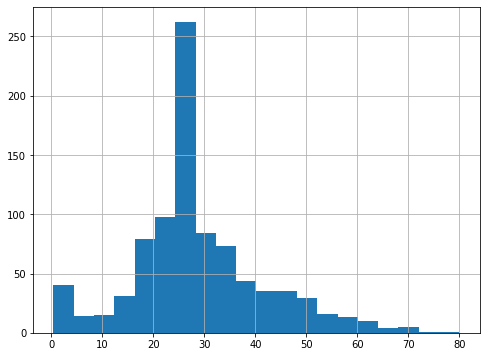

In [123]:
df["Age"].hist(bins=20, figsize=(8, 6))

A _média_ corresponde à soma dos valores dividida pela quantidade de elementos:

ex: A média de **28, 29, 29, 30, 31, 31** é: $(28+29+29+30+31+31)/6 = 29.66...$

In [46]:
df["Age"].mean()

29.64209269662921

A _mediana_ é o elemento central numa lista ordenada dos valores

ex: **1, 1, ... 27, 28, <span style="color: red">28</span>, 28, 29, ... 80, 81**

In [47]:
df["Age"].median()

28.0

A _moda_ representa o valor que mais se repete dentre os elementos.

ex: **20, 21, 22, <span style="color: red">24, 24, 24,</span> 27, 28**. O número **24** é que mais se repete.

In [48]:
df["Age"].mode()[0]

24.0

Usando o método `fillna` podemos preencher os valores faltantes da coluna `Age`. Vamos preencher com o valor da `mediana`.

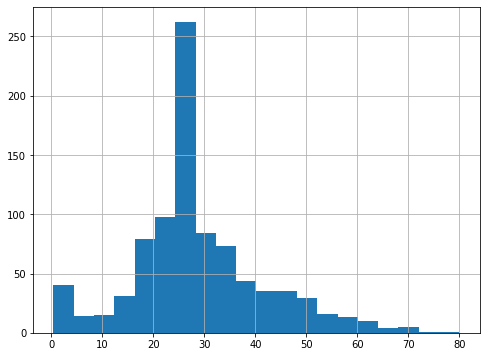

In [122]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Age"].hist(bins=20, figsize=(8, 6))

Vemos que a distribuição das idades fica bastante alterada, mas pelo menos temos uma tabela com todos os valores preenchidos.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


---
### Exercícios

# SE PREPAREM!

#### E2.4.1
Qual é a média do valor da passagem paga pelos passageiros da terceira classe? e da primeira classe?

#### E2.4.2
Quantos passageiros que estão no `DataFrame` `df` sobreviveram ao naufrágio?

#### E2.4.3
Quais são as taxas de sobrevivência dos passageiros de cada uma das três classes?

#### E2.4.4
Qual é a taxa de sobrevivência  dos passageiros de até 16 anos? e com 16 ou mais?

#### E2.4.5
Qual é a taxa de sobrevivência dos passageiros do sexo feminino? e do sexo masculino?

---
Phew! Já cobrimos muita coisa:
* DataFrames
* Series
* Indexação e Seleção de Dados
* Indexação Booleana
* Atribuição de Valores
* Métodos do DataFrame
* Dados faltantes

Também pudemos tirar algumas conclusões sobre os dados do naufrágio do **Titanic**:

1. Passageiros da primeira classe tem uma taxa de sobrevivência maior:
2. Passageiros com menos de 18 anos tem uma taxa de sobrevivência maior
3. Passageiros do sexo feminino tem uma taxa de sobrevivência maior

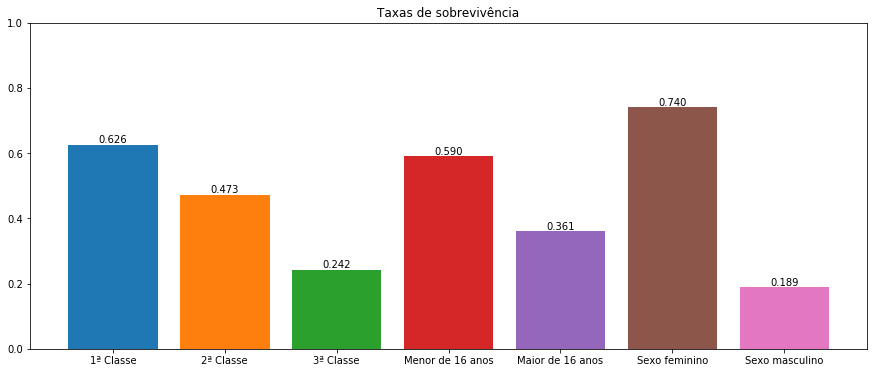

In [157]:
filtros = [
    ("1ª Classe", df["Pclass"] == 1),
    ("2ª Classe", df["Pclass"] == 2),
    ("3ª Classe", df["Pclass"] == 3),
    ("Menor de 16 anos", df["Age"] < 16),
    ("Maior de 16 anos", df["Age"] >= 16),
    ("Sexo feminino", df["Sex"] == "female"),
    ("Sexo masculino", df["Sex"] == "male"),
]
eixo_x = []
eixo_y = []
for categoria, filtro in filtros:
    eixo_x.append(categoria)
    eixo_y.append(df[filtro]["Survived"].sum()/len(df[filtro]))

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_ylim(0, 1)
ax.set_title("Taxas de sobrevivência")
rects = ax.bar(
    eixo_x, eixo_y,
    color=PALETA,
)
for rect in rects:
    height = rect.get_height()
    ax.annotate("{:.3f}".format(float(height)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                ha="center", va='bottom')

In [144]:
df.groupby("Sex")["Survived"].sum()

Sex
female    231
male      109
Name: Survived, dtype: int64

https://titanicfacts.net/titanic-survivors-list/